__三维数据预处理及输入尺寸标准化模块__

In [15]:
%matplotlib widget
import scipy.io as io
import numpy as np
import matplotlib.pyplot as plt
#导入数据并处理为完全0-1分布
data = io.loadmat('../../Matlab_files/top3d_Cantilever_new/top3d_Cantilever_new.m')
data = data['ans']
data = np.array(data)
print(data.shape)
data = data.transpose(1, 2, 0)
print(data.shape)#(x,z,y)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        for k in range(data.shape[2]):
            if data[i][j][k] > 0.5:
                data[i][j][k] = 1
            else:
                data[i][j][k] = 0


#初始0-1分布数据绘图
# mycolormap = plt.get_cmap('winter')
# data_max = data.max()
# relativevalue = np.round(data / data_max, 1)
# colorsvalues = mycolormap(relativevalue)
# fig = plt.figure(figsize=(50, 50))
# ax = fig.add_subplot(projection='3d')
# ax.set_xlabel('X Axis')
# ax.set_ylabel('Y Axis')
# ax.set_zlabel('Z Axis')
# ax.set_xlim(0, 150)
# ax.set_ylim(0, 150)
# ax.set_zlim(75, -75)
# ax.voxels(data, facecolors=colorsvalues,edgecolors = 'k', shade = False)

#数据尺寸扩展为标准尺寸
nelx, nely, nelz = 100, 100, 100
if (nelx - data.shape[0])%2 !=0:
    data = np.pad(data, ((1, 0), (0, 0), (0 ,0)))
if (nelz - data.shape[1])%2 !=0:
    data = np.pad(data, ((0, 0), (1, 0), (0 ,0)))
if (nely - data.shape[2])%2 !=0:
    data = np.pad(data, ((0, 0), (0, 0), (1 ,0)))
data_new = np.pad(data, (((nelx - data.shape[0])//2, (nelx - data.shape[0])//2),
                     ((nely - data.shape[1])//2, (nely - data.shape[1])//2),
                     ((nelz - data.shape[2])//2, (nelx - data.shape[2])//2)))
print(data_new.shape)
#输入数据标准化后绘图
mycolormap = plt.get_cmap('winter')
data_new_max = data.max()
relativevalue = np.round(data_new / data_new_max, 1)
colorsvalues = mycolormap(relativevalue)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_xlim(0, 150)
ax.set_ylim(0, 150)
ax.set_zlim(75, -75)
ax.voxels(data_new, facecolors=colorsvalues,edgecolors = 'k', shade = False)
# np.save('../topodata(03.06)/top3d_cantilever_beam_50.npy',data_new)

ValueError: Unknown mat file type, version 112, 101

__六方体行进法遍历模型，寻找断裂点，单共享边修复模块__

1: [0.0]
2: [0.0, 1.0]
3: [0.0, 1.0, 0.0]
4: [0.0, 1.0, 0.0, 1.0]
5: [0.0, 1.0, 0.0, 1.0, 0.0]
6: [0.0, 1.0, 0.0, 1.0, 0.0, 1.0]
face_voxel: [0.0, 1.0, 0.0, 1.0, 0.0, 1.0]
1: [0.0]
2: [0.0, 0.0]
3: [0.0, 0.0, 0.0]
4: [0.0, 0.0, 0.0, 1.0]
5: [0.0, 0.0, 0.0, 1.0, 1.0]
6: [0.0, 0.0, 0.0, 1.0, 1.0, 1.0]
face_voxel: [0.0, 0.0, 0.0, 1.0, 1.0, 1.0]
1: [0.0]
2: [0.0, 0.0]
3: [0.0, 0.0, 0.0]
4: [0.0, 0.0, 0.0, 1.0]
5: [0.0, 0.0, 0.0, 1.0, 1.0]
6: [0.0, 0.0, 0.0, 1.0, 1.0, 1.0]
face_voxel: [0.0, 0.0, 0.0, 1.0, 1.0, 1.0]
1: [0.0]
2: [0.0, 0.0]
3: [0.0, 0.0, 0.0]
4: [0.0, 0.0, 0.0, 1.0]
5: [0.0, 0.0, 0.0, 1.0, 1.0]
6: [0.0, 0.0, 0.0, 1.0, 1.0, 1.0]
face_voxel: [0.0, 0.0, 0.0, 1.0, 1.0, 1.0]
1: [0.0]
2: [0.0, 0.0]
3: [0.0, 0.0, 0.0]
4: [0.0, 0.0, 0.0, 1.0]
5: [0.0, 0.0, 0.0, 1.0, 1.0]
6: [0.0, 0.0, 0.0, 1.0, 1.0, 1.0]
face_voxel: [0.0, 0.0, 0.0, 1.0, 1.0, 1.0]
1: [0.0]
2: [0.0, 1.0]
3: [0.0, 1.0, 0.0]
4: [0.0, 1.0, 0.0, 1.0]
5: [0.0, 1.0, 0.0, 1.0, 1.0]
6: [0.0, 1.0, 0.0, 1.0, 1.0, 1.0]
face_voxel:

{(20, 48, 68): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24e85da9df0>,
 (20, 48, 79): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24e85da93a0>,
 (20, 49, 65): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24e86617af0>,
 (20, 49, 79): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24e866308b0>,
 (20, 50, 65): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24e86630c70>,
 (20, 50, 79): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24e86630fa0>,
 (20, 51, 68): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24e86755430>,
 (20, 51, 79): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24e867557f0>,
 (21, 48, 61): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24e86755bb0>,
 (21, 48, 68): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24e86755f70>,
 (21, 48, 73): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24e86762370>,
 (21, 48, 79): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24e86762700>,
 (21, 49, 58): <mpl_toolkits.mplot3d.art3d.Poly3DCol

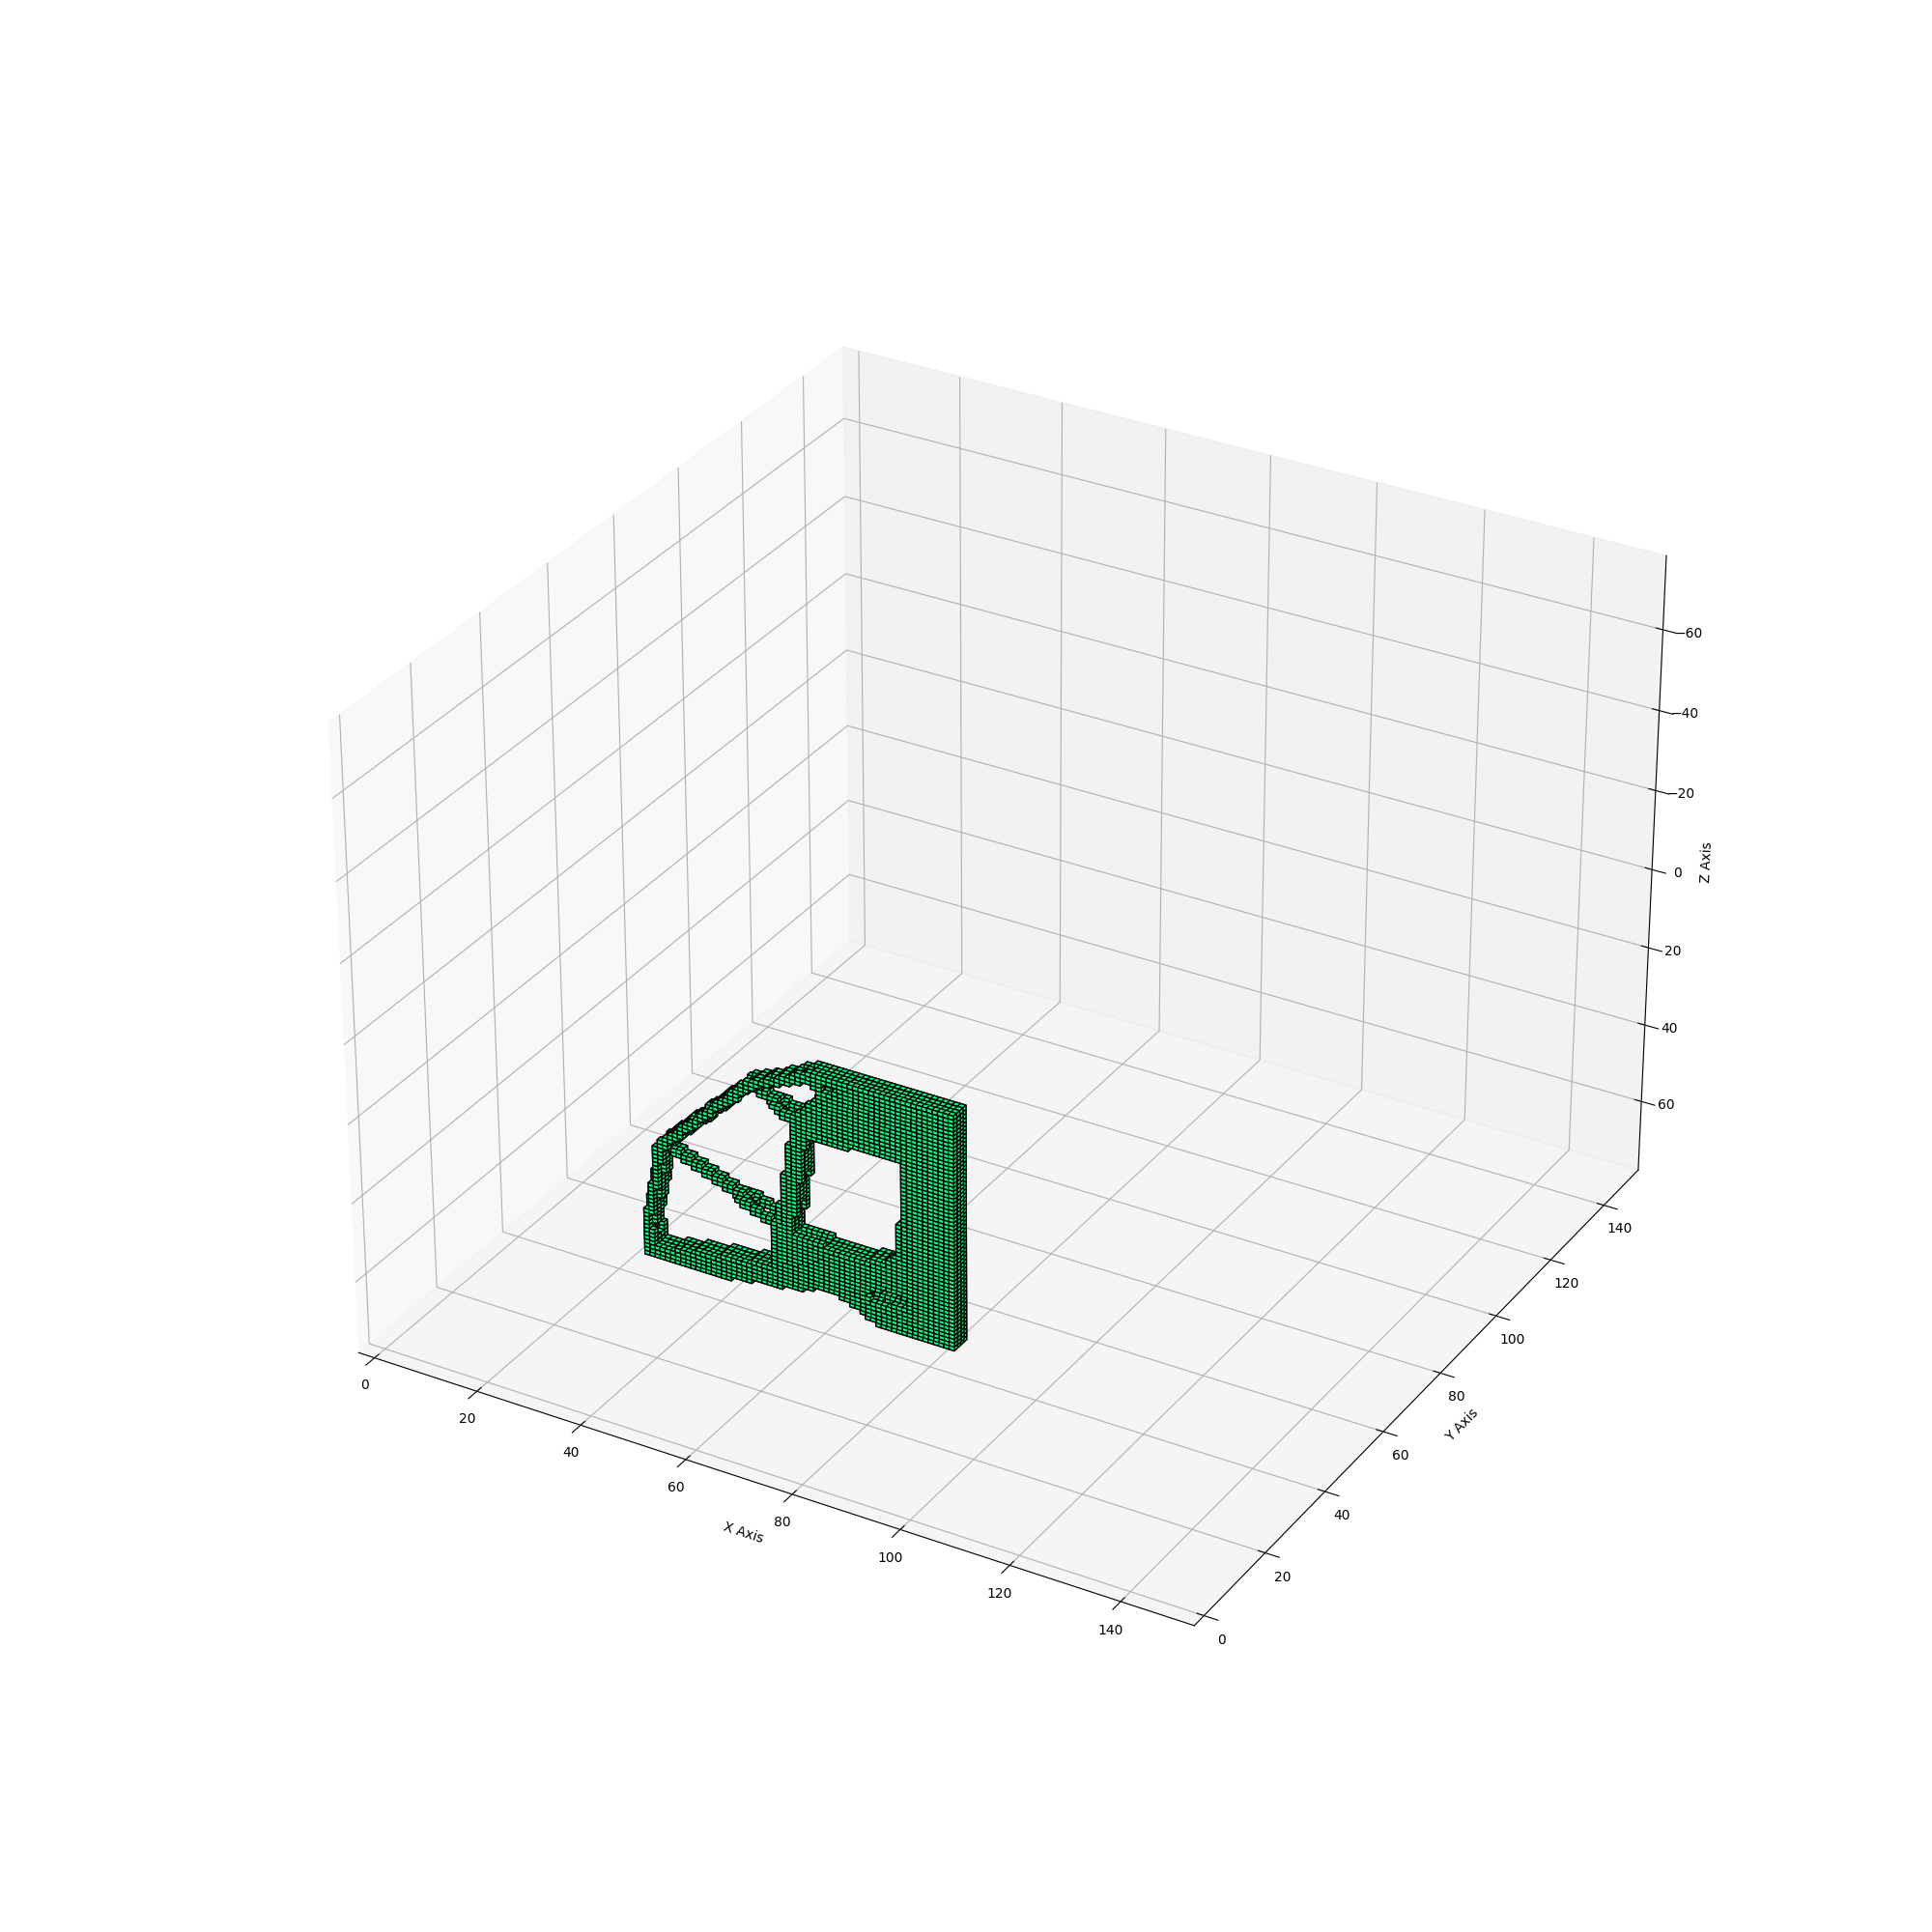

In [8]:
%matplotlib widget
label_data = np.zeros((100, 100, 100))
face_voxel = []
for i in range(data_new.shape[0]):
    for j in range(data_new.shape[1]):
        for k in range(data_new.shape[2]):
            if data_new[i][j][k] !=0:
                face_voxel.append(data_new[i-1][j][k])
                print('1:',face_voxel)
                face_voxel.append(data_new[i+1][j][k])
                print('2:',face_voxel)
                face_voxel.append(data_new[i][j-1][k])
                print('3:',face_voxel)
                face_voxel.append(data_new[i][j+1][k])
                print('4:',face_voxel)
                face_voxel.append(data_new[i][j][k-1])
                print('5:',face_voxel)
                face_voxel.append(data_new[i][j][k+1])
                print('6:',face_voxel)
                sum_value = sum(face_voxel)
                print('face_voxel:',face_voxel)

                if sum_value == 0 or sum_value == 1:
                    data_new[i, j, k-1] = 1
                    # label_data[i-2:i+2,j-2:j+2,k-2:k+2] = data_new[i-2:i+2,j-2:j+2,k-2:k+2]
                    
                face_voxel = []
mycolormap = plt.get_cmap('winter')
data_new_max = data_new.max()
relativevalue = np.round(data_new / data_new_max, 1)
colorsvalues = mycolormap(relativevalue)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_xlim(0, 150)
ax.set_ylim(0, 150)
ax.set_zlim(75, -75)
ax.voxels(data_new, facecolors=colorsvalues,edgecolors = 'k', shade = False)
# np.save('../topodata(03.06)/top3d_MBB_200_repair.npy',label_data)


__.npy文件转.mat文件模块__

In [19]:
import scipy.io as io
io.savemat('../topodata(03.06)/top3d_MBB_200_repair.mat',{'data':data_new})

No such comm: c38c0a90017043d6a92377d5ba2f339d


FileNotFoundError: [Errno 2] No such file or directory: '../topodata(03.06)/top3d_MBB_200_repair.mat'

__三维输入结构随机断裂模块__

进行了 62 次搜索
1.0
i, j, k: 70 49 35


{(20, 48, 68): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24f02a8de50>,
 (20, 48, 79): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24f07233100>,
 (20, 49, 65): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24f07064dc0>,
 (20, 49, 79): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24f0700f580>,
 (20, 50, 65): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24f0326c670>,
 (20, 50, 79): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24f0326ca00>,
 (20, 51, 68): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24f0326cdc0>,
 (20, 51, 79): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24f033f01c0>,
 (21, 48, 61): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24f033f0580>,
 (21, 48, 68): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24f033f0940>,
 (21, 48, 73): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24f033f0d00>,
 (21, 48, 79): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24f033fe0d0>,
 (21, 49, 58): <mpl_toolkits.mplot3d.art3d.Poly3DCol

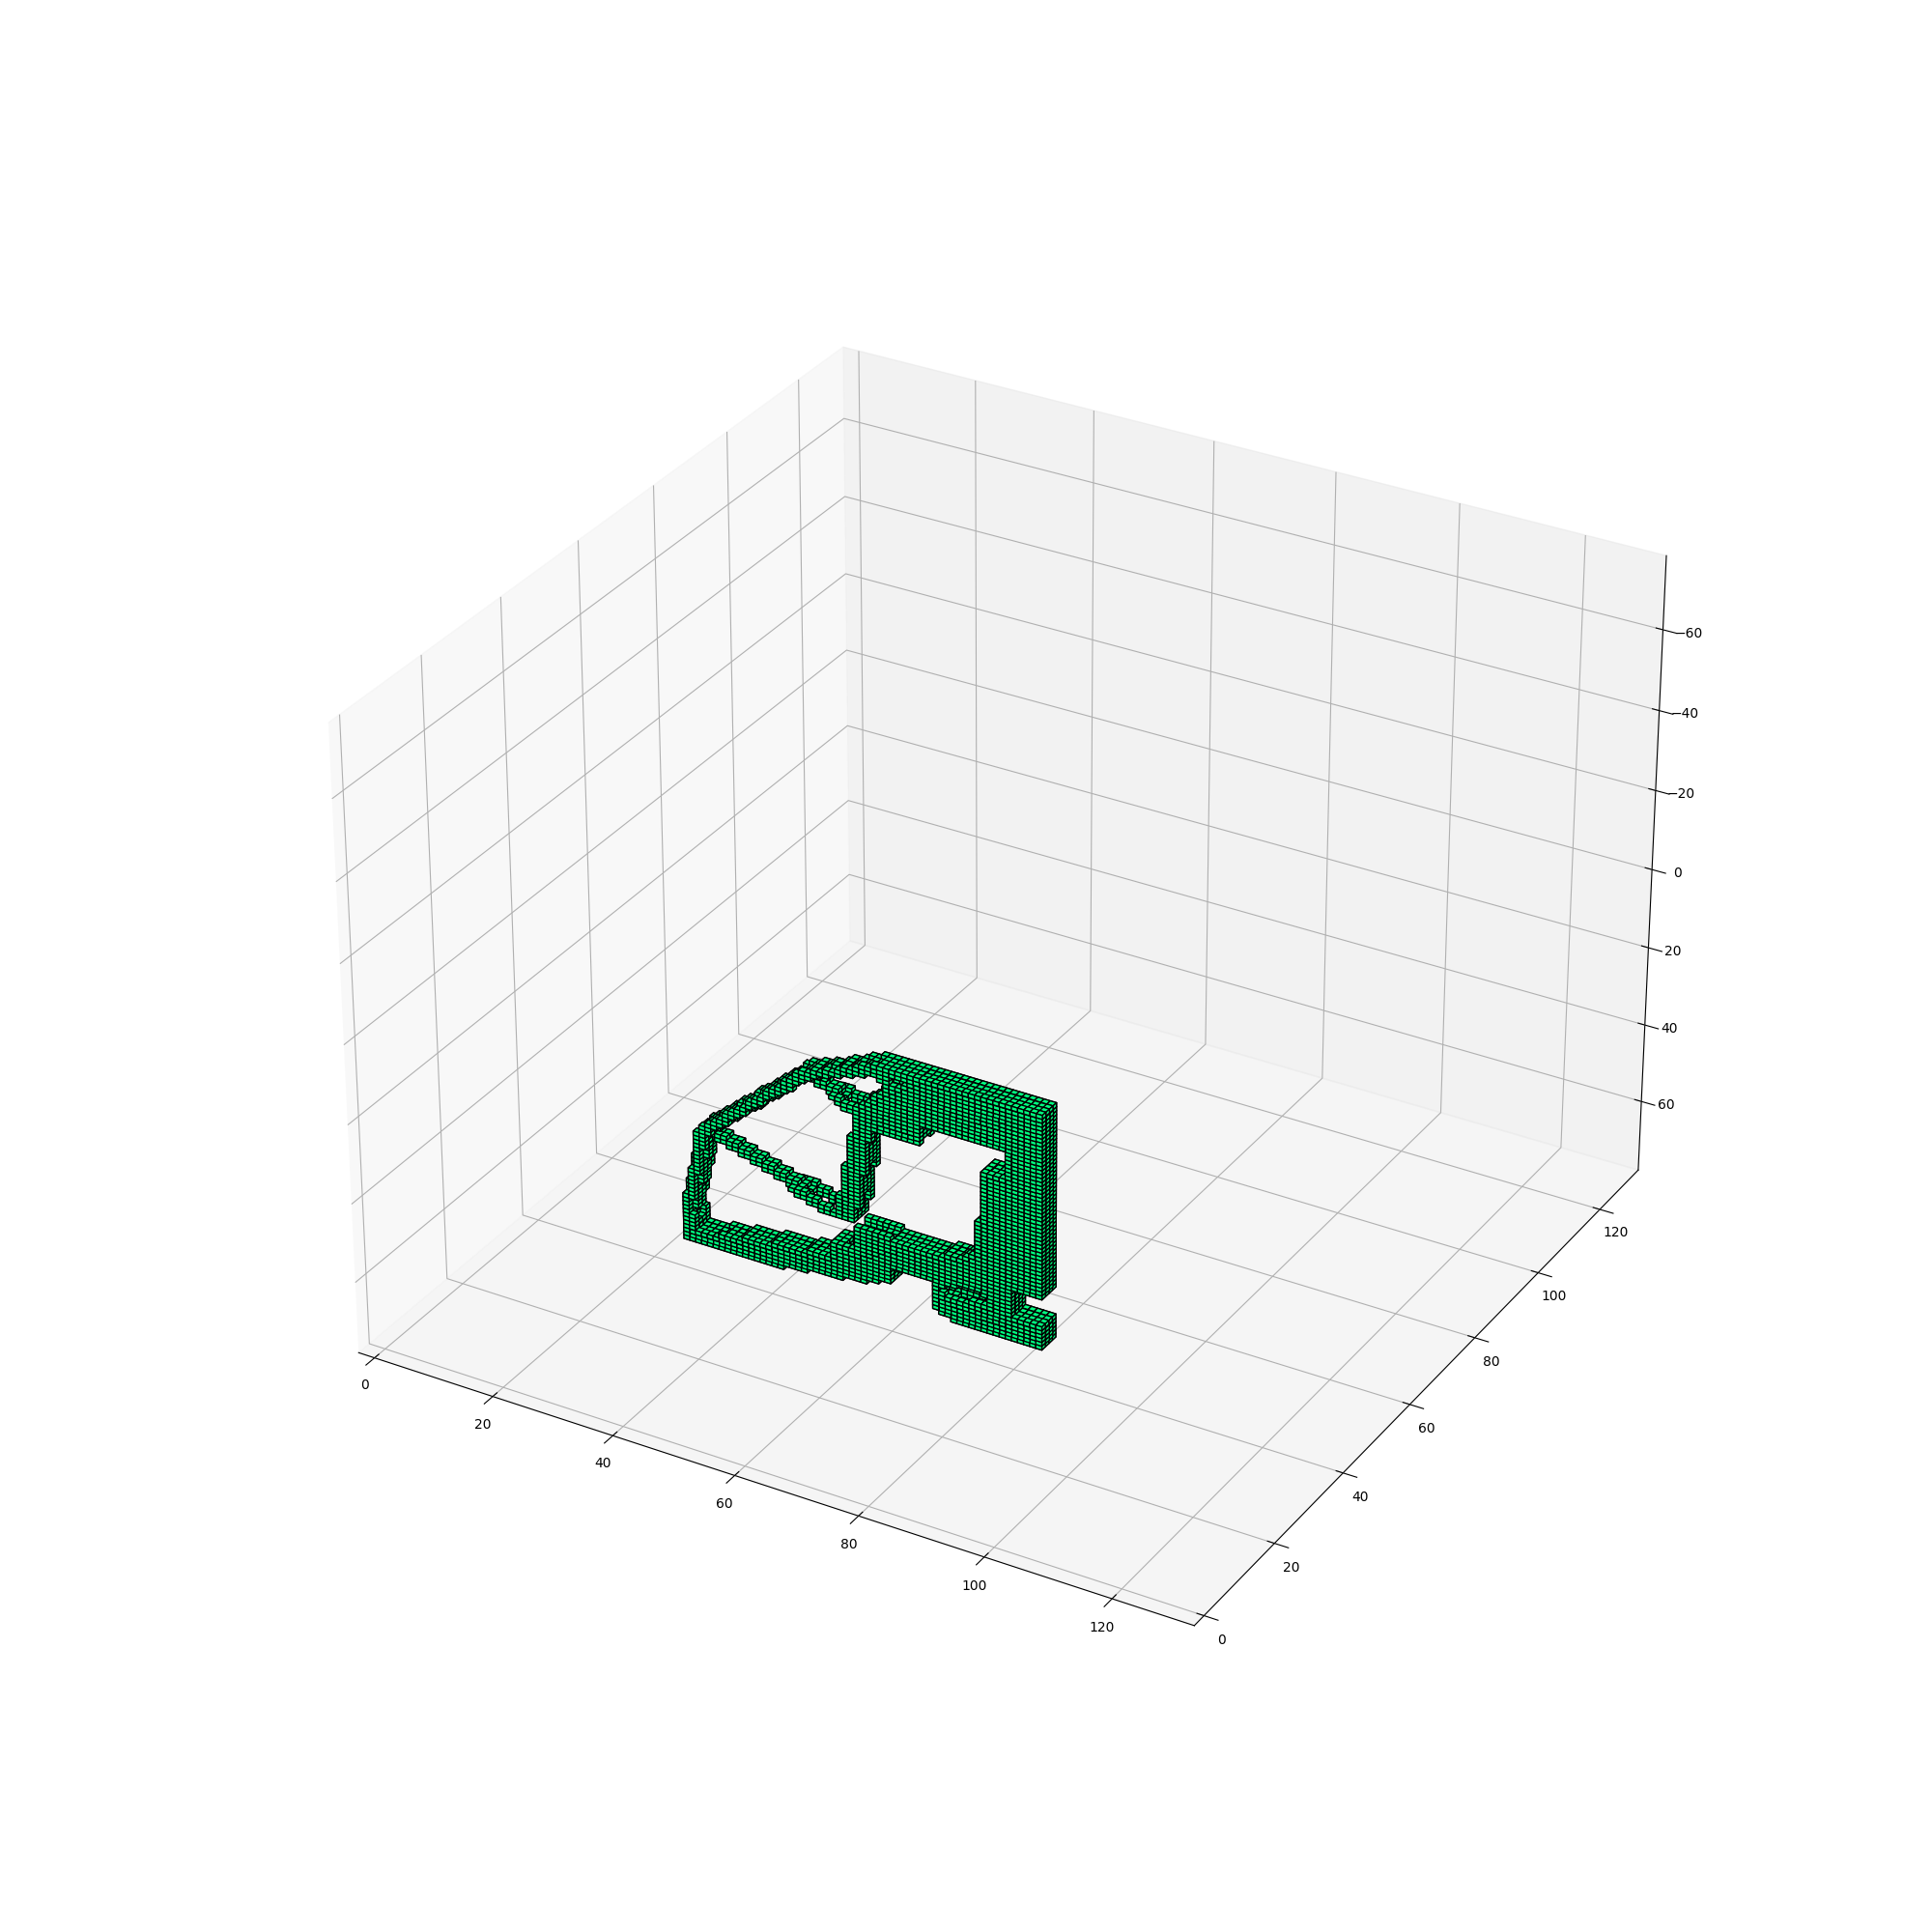

In [14]:
%matplotlib widget
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt


# #读取数据
# data_old = io.loadmat('../../Matlab_files/top3d_MBB/top3d_MBB_200.mat')
# data_old = data_old['ans']
# data_old = np.array(data_old)
# data_old = data_old.transpose(1, 2, 0)
# print(data_old.shape)#(x,z,y)


# #预处理数据为0-1分布
# for i in range(data_old.shape[0]):
#     for j in range(data_old.shape[1]):
#         for k in range(data_old.shape[2]):
#             if data_old[i][j][k] > 0.5:
#                 data_old[i][j][k] = 1
#             else:
#                 data_old[i][j][k] = 0

# #处理数据为标准输入尺寸                
# nelx, nely, nelz = 100, 100, 100
# if (nelx - data_old.shape[0])%2 !=0:
#     data_old = np.pad(data_old, ((1, 0), (0, 0), (0 ,0)))
# if (nelz - data_old.shape[1])%2 !=0:
#     data_old = np.pad(data_old, ((0, 0), (1, 0), (0 ,0)))
# if (nely - data_old.shape[2])%2 !=0:
#     data_old = np.pad(data_old, ((0, 0), (0, 0), (1 ,0)))
# data_new = np.pad(data_old, (((nelx - data_old.shape[0])//2, (nelx - data_old.shape[0])//2),
#                      ((nely - data_old.shape[1])//2, (nely - data_old.shape[1])//2),
#                      ((nelz - data_old.shape[2])//2, (nelx - data_old.shape[2])//2)))
# print('data_new:',data_new.shape)

#随机断开模型结构
extract_data = 0
i = 0
while extract_data ==0:
    index = np.random.randint(0, 100, size=(3, ))
    extract_data = data_new[index[0]][index[1]][index[2]]
    i +=1
print('进行了',i,'次搜索')
print(extract_data)
i, j ,k = index[0], index[1], index[2]
print('i, j, k:',i,j,k)
for m in range(i-3,i+4):
    for n in range(j-3, j+4):
        for t in range(k-3, k+4):
            data_new[m][n][t] = 0


mycolormap = plt.get_cmap('winter')
data_new_max = data_new.max()
relativevalue = np.round(data_new / data_new_max, 1)
colorsvalues = mycolormap(relativevalue)
fig  = plt.figure(figsize=(20 ,20))
ax = fig.add_subplot(projection='3d')
ax.set_xlim(0, 130)
ax.set_ylim(0, 130)
ax.set_zlim(75, -75)
ax.voxels(data_new, facecolors=colorsvalues, edgecolors='k',shade=False)

In [12]:
import scipy.io as io
io.savemat('../../Matlab_files/test1.mat',{'data':data})
